# Preprocessing
This notebook generates the dataset for training.

In [6]:
from glob import glob
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

SIZE = 32

First, get the paths of the images from the SMILEs dataset and put them in the correct bins.

In [7]:
img_paths = []
positives = glob("../data/positives/*.jpg")
img_paths.extend(positives)
negatives = glob("../data/negatives/*.jpg")
img_paths.extend(negatives)

Next preprocess the images (change to monochrome, resize and convert to array). Also create the right labels. After this step, the data is almost ready for processing.

In [8]:
data = []
labels = []

for img_path in img_paths:
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = imutils.resize(image, width=SIZE)
    image = img_to_array(image)
    data.append(image)

    if(img_path in positives):
        label = 1
    else:
        label = 0
    labels.append(label)

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)




Now we check if the data is loaded correctly.

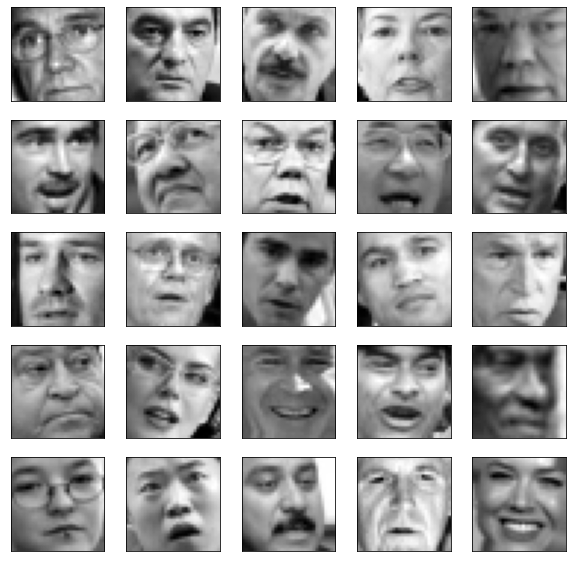

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    idx = np.random.choice(len(data))
    plt.imshow(data[idx], cmap = "gray")
    if(labels[idx] == 1):
        text = "Smiling"
    else:
        text = "Not Smiling"
    plt.xlabel(text, color = "white")
plt.show()

Now that this looks good, we partition the data into train and test sets and export them for training.

In [10]:
(train_images, test_images, train_labels, test_labels) = train_test_split(data,
	labels, test_size=0.20, stratify=labels)

np.savez_compressed("../data/processed/data" + str(SIZE) + ".npz",
    train_images = train_images,
    test_images = test_images,
    train_labels = train_labels,
    test_labels = test_labels)